In [1]:
import pandas as pd
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.info() #tipo de cada coluna e verificação de valores nulos
df.describe() #estatísticas básicas
df.isnull().sum() #verifica contagem de valores nulos por coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
df = df.drop('id', axis = 1) #remove coluna id
df['bmi'] = df['bmi'].fillna(df['bmi'].median()) #preenche valores vazios de bmi com mediana
df = pd.get_dummies(df, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   bool   
 7   gender_Male                     5110 non-null   bool   
 8   gender_Other                    5110 non-null   bool   
 9   ever_married_No                 5110 non-null   bool   
 10  ever_married_Yes                5110 non-null   bool   
 11  work_type_Govt_job              5110 non-null   bool   
 12  work_type_Never_worked          51

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,28.1,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [4]:
bool_cols = df.select_dtypes(include = ['bool']).columns #identifica as colunas bool
df[bool_cols] = df[bool_cols].astype(int) #converte bool pra int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   int64  
 7   gender_Male                     5110 non-null   int64  
 8   gender_Other                    5110 non-null   int64  
 9   ever_married_No                 5110 non-null   int64  
 10  ever_married_Yes                5110 non-null   int64  
 11  work_type_Govt_job              5110 non-null   int64  
 12  work_type_Never_worked          51

In [5]:
from sklearn.model_selection import train_test_split
x = df.drop('stroke', axis = 1) #matriz de caracteristicas
y = df['stroke'] #resultado
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 6) #separa 80% dos dados para treino e 20% para teste
print(f"Pacientes no treino: {x_treino.shape[0]}")
print(f"Pacientes no teste: {x_teste.shape[0]}")

Pacientes no treino: 4088
Pacientes no teste: 1022


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
modelo = DecisionTreeClassifier(random_state = 6, class_weight = 'balanced') #cria o modelo
modelo.fit(x_treino, y_treino) #treina o modelo
previsoes = modelo.predict(x_teste) #testa o modelo
print("Acerto:", accuracy_score(y_teste, previsoes))
print("\nRelatório Detalhado:\n", classification_report(y_teste, previsoes))

Acerto: 0.9207436399217221

Relatório Detalhado:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       971
           1       0.16      0.14      0.15        51

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.92      0.92      0.92      1022



In [7]:
!pip install imbalanced-learn

In [8]:
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#identificar categorias
categorias = []
for i, col in enumerate(x_treino.columns):
    if x_treino[col].nunique() <= 2: #se a coluna for binaria ou for int
        categorias.append(i)

smotenc = SMOTENC(categorical_features = categorias, random_state = 6) #não quebra os valores de categorias
x_treino_blc, y_treino_blc = smotenc.fit_resample(x_treino, y_treino)

#verificação
print(f"Antes: {y_treino.value_counts().to_dict()}")
print(f"Depois: {y_treino_blc.value_counts().to_dict()}")

modelo_rf = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', random_state = 6) #cria floresta com 100 árvores
modelo_rf.fit(x_treino_blc, y_treino_blc) #treina a floresta
previsoes_rf = modelo_rf.predict(x_teste) #testa os dados originais

probabilidades = modelo_rf.predict_proba(x_teste)
chance_avc = probabilidades[:, 1] #pega a coluna 1
limiar = 0.09 #novo limite
novas_previsoes = (chance_avc >= limiar).astype(int)

print("Acurácia:", accuracy_score(y_teste, novas_previsoes)) 
print("\nRelatório:\n", classification_report(y_teste, novas_previsoes))

Antes: {0: 3890, 1: 198}
Depois: {0: 3890, 1: 3890}
Acurácia: 0.662426614481409

Relatório:
               precision    recall  f1-score   support

           0       0.99      0.65      0.79       971
           1       0.12      0.86      0.20        51

    accuracy                           0.66      1022
   macro avg       0.55      0.76      0.49      1022
weighted avg       0.95      0.66      0.76      1022



In [9]:
#ajuste de hiperparametros
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

tabela_param = {
    'n_estimators': [100, 200, 300], #numero de arvores
    'max_depth': [10, 20, 30, None], #profundidade max da arvore
    'min_samples_split': [2, 5, 10], #min de exemplos pra dividir um nó
    'min_samples_leaf': [1, 2, 4], #min de exemplos numa folha
    'bootstrap': [True, False] #metodo de amostragem
}

#Randomized Search
rf_ajuste = RandomizedSearchCV(estimator = RandomForestClassifier(class_weight = 'balanced', random_state = 6),
                               param_distributions = tabela_param,
                               n_iter = 50, #50 combinações diferentes
                               cv = 3, #valida cada combinação 3 vezes
                               verbose = 2,
                               random_state = 6,
                               n_jobs = -1, #uso de nucleos
                               scoring = 'recall' #prioriza o recall
                              )

rf_ajuste.fit(x_treino_blc, y_treino_blc) #busca pelos hiperparametros
print(rf_ajuste.best_params_) #printa os melhores

#testa o melhor modelo
melhor_modelo = rf_ajuste.best_estimator_ 
previsoes_otimizadas = melhor_modelo.predict(x_teste)

print("Acurácia:", accuracy_score(y_teste, previsoes_otimizadas))
print(classification_report(y_teste, previsoes_otimizadas))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}
Acurácia: 0.8532289628180039
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       971
           1       0.18      0.53      0.26        51

    accuracy                           0.85      1022
   macro avg       0.57      0.70      0.59      1022
weighted avg       0.93      0.85      0.89      1022



In [10]:
melhor_modelo = rf_ajuste.best_estimator_
probabilidades = melhor_modelo.predict_proba(x_teste)
chance_avc = probabilidades[:, 1]
limiar = 0.09
previsoes_finais = (chance_avc >= limiar).astype(int)
print("Acurácia:", accuracy_score(y_teste, previsoes_finais))
print(classification_report(y_teste, previsoes_finais))

Acurácia: 0.48336594911937375
              precision    recall  f1-score   support

           0       0.99      0.46      0.63       971
           1       0.08      0.94      0.15        51

    accuracy                           0.48      1022
   macro avg       0.54      0.70      0.39      1022
weighted avg       0.95      0.48      0.60      1022



In [11]:
#encontrar o melhor limiar
for i in np.arange(0.05, 0.51, 0.05):
    previsoes_teste = (chance_avc >= i).astype(int)
    acc = accuracy_score(y_teste, previsoes_teste)
    rep = classification_report(y_teste, previsoes_teste, output_dict=True)
    rec_avc = rep['1']['recall']
    prec_avc = rep['1']['precision']

    print(f"{i:.2f}       | {acc:.2f}       | {rec_avc:.2f}            | {prec_avc:.2f}")

0.05       | 0.41       | 1.00            | 0.08
0.10       | 0.51       | 0.94            | 0.09
0.15       | 0.58       | 0.88            | 0.10
0.20       | 0.64       | 0.82            | 0.11
0.25       | 0.68       | 0.78            | 0.11
0.30       | 0.73       | 0.75            | 0.12
0.35       | 0.76       | 0.67            | 0.13
0.40       | 0.79       | 0.63            | 0.14
0.45       | 0.82       | 0.57            | 0.15
0.50       | 0.85       | 0.53            | 0.18


In [12]:
!pip install optuna

In [13]:
#teste com optuna
import optuna
from sklearn.metrics import f1_score

def objetivo(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500), #num arvores
        'max_depth': trial.suggest_int('max_depth', 5, 30), #profundidade max
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15), #min de exemplos pra dividir um nó
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10), #min de exemplos numa folha
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': 'balanced', #fixo para ajudar no desbalanceamento
        'random_state': 6,
        'n_jobs': -1
    }

    #cria e treina modelo
    modelo = RandomForestClassifier(**params)
    modelo.fit(x_treino_blc, y_treino_blc)

    preds = modelo.predict(x_teste) #testa
    return f1_score(y_teste, preds, pos_label=1)

#estudo e otimização
estudo_rf = optuna.create_study(direction = 'maximize')
estudo_rf.optimize(objetivo, n_trials = 100)
print(estudo_rf.best_params)

[I 2026-01-29 15:18:15,592] A new study created in memory with name: no-name-dc3db40a-926e-40ca-8886-95837201298e
[I 2026-01-29 15:18:17,429] Trial 0 finished with value: 0.21818181818181817 and parameters: {'n_estimators': 422, 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 0 with value: 0.21818181818181817.
[I 2026-01-29 15:18:19,041] Trial 1 finished with value: 0.24615384615384617 and parameters: {'n_estimators': 330, 'max_depth': 19, 'min_samples_split': 12, 'min_samples_leaf': 9, 'bootstrap': True}. Best is trial 1 with value: 0.24615384615384617.
[I 2026-01-29 15:18:20,255] Trial 2 finished with value: 0.22018348623853212 and parameters: {'n_estimators': 360, 'max_depth': 24, 'min_samples_split': 5, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 1 with value: 0.24615384615384617.
[I 2026-01-29 15:18:20,956] Trial 3 finished with value: 0.23809523809523808 and parameters: {'n_estimators': 165, 'max_depth': 23, 'min_sa

{'n_estimators': 276, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 10, 'bootstrap': True}


In [14]:
from sklearn.metrics import classification_report

melhores_params = estudo_rf.best_params
melhores_params['class_weight'] = 'balanced'
melhores_params['random_state'] = 6
melhores_params['n_jobs'] = -1

#treino
modelo_final_rf = RandomForestClassifier(**melhores_params)
modelo_final_rf.fit(x_treino_blc, y_treino_blc)

limiar_final = 0.20 
probabilidades = modelo_final_rf.predict_proba(x_teste)[:, 1]
previsoes_finais = (probabilidades >= limiar_final).astype(int)

print("Acurácia:", accuracy_score(y_teste, previsoes_finais))
print(classification_report(y_teste, previsoes_finais))

Acurácia: 0.6340508806262231
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       971
           1       0.11      0.86      0.19        51

    accuracy                           0.63      1022
   macro avg       0.55      0.74      0.48      1022
weighted avg       0.94      0.63      0.73      1022



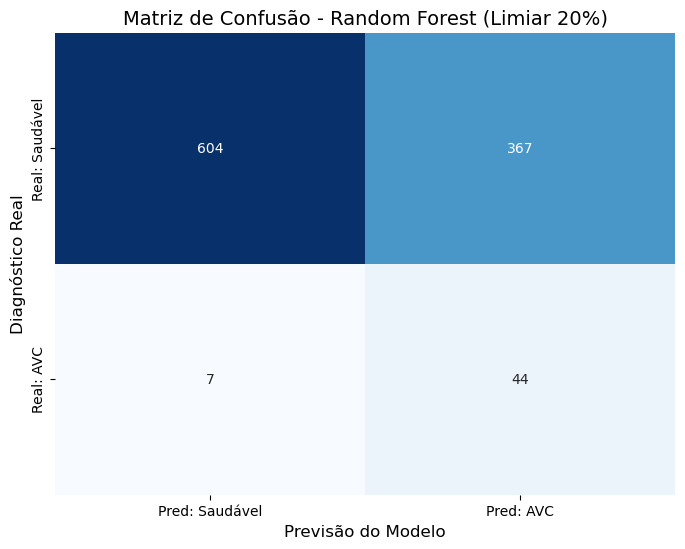

In [16]:
#matriz de confusão
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_teste, previsoes_finais)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot =True, fmt ='d', cmap = 'Blues', cbar = False,
            xticklabels = ['Pred: Saudável', 'Pred: AVC'],
            yticklabels = ['Real: Saudável', 'Real: AVC'])

plt.title('Matriz de Confusão - Random Forest (Limiar 20%)', fontsize = 14)
plt.ylabel('Diagnóstico Real', fontsize = 12)
plt.xlabel('Previsão do Modelo', fontsize = 12)
plt.show()

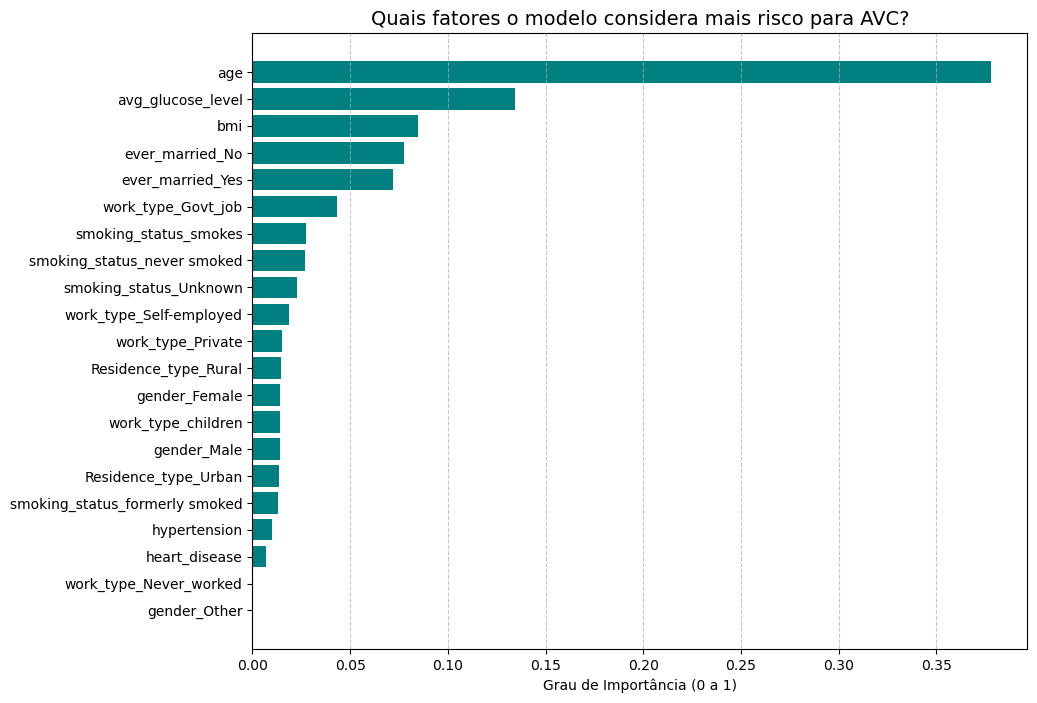

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

#modelo final
melhores_params = estudo_rf.best_params
melhores_params['class_weight'] = 'balanced'
melhores_params['random_state'] = 6
melhores_params['n_jobs'] = -1
modelo_final = RandomForestClassifier(**melhores_params)
modelo_final.fit(x_treino_blc, y_treino_blc)

#pega a importancia de cada coluna de dentro do modelo treinado 
importancias = modelo_final.feature_importances_
colunas = x_treino.columns

df_imp = pd.DataFrame({'Atributo': colunas, 'Importancia': importancias})
df_imp = df_imp.sort_values('Importancia', ascending = True) #ordenação crescente

plt.figure(figsize = (10, 8))
plt.barh(df_imp['Atributo'], df_imp['Importancia'], color = 'teal')
plt.xlabel('Grau de Importância (0 a 1)')
plt.title('Quais fatores o modelo considera mais risco para AVC?', fontsize = 14)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()